Some Demostration for Scene Database `scene_db`

The scene database is designed to maintain up-to-date scene and outdated scene.

Users are expected to use this module to customize their own
dataloader for the scene update guilded by RGB images research. 

Here, I will demostrate a few basic dataloader.

In [159]:
import matplotlib.pyplot as plt
import mediapy
import numpy as np

import scene_point_etk.argoverse2 as argoverse2
import scene_point_etk.scene_db as scene_db

import scene_point_etk.evaluation as scene_evaluation
import scene_point_etk.visualization as scene_visualization
import py_utils.visualization_pptk
import py_utils.utils_img

---
0. listing and query

In [2]:
# it will list all available scene ids
# the scene_ids here are exact as argoverse log_ids
# (see 02.usage.argoverse.ipynb)
# but scene id is not necessarily equal to log_id

scene_db.list_scene_ids()[:3]

['00a6ffc16ce93bc3a0606006e9893a1a',
 '01bb304d7bd835f8bbef7086b688e35e',
 '022af47699373e70be52f65420d52703']

In [3]:
# each scene_id may have multiple versions
# each version indicate different outdated scene
scene_db.list_versions_by_scene_id("00a6ffc16ce93bc3a0606006e9893a1a")

['v0.add', 'v0.delete', 'v0.manually_removed', 'v0.overall']

In [4]:
# for train/val/test dataset split purpose, it is good to have exact
# same ID to match between argoverse log_id and scene_db scene_id

# for example:

# get argoverse train log ids
train_argo_ids = argoverse2.list_log_ids_by_mode("train")

print("argoverse train log ids:")
print("\n".join(train_argo_ids[:3]))
print("")

# get corresponding scene_db scene ids
train_scene_pairs = scene_db.list_scene_version_pairs(
    scene_ids=train_argo_ids[:3],
    versions=[],
)
print("scene_db train scene id and corresponding versions:")
print("\n".join([f"{sid}, {ver}" for sid, ver in train_scene_pairs]))
print("")

# or get corresponding scene_db scene ids and specified version
train_scene_pairs = scene_db.list_scene_version_pairs(
    scene_ids=train_argo_ids[:3],
    versions=["v0.add", "v0.overall"],
)
print("scene_db train scene id and specific versions:")
print("\n".join([f"{sid}, {ver}" for sid, ver in train_scene_pairs]))
print("")

argoverse train log ids:
00a6ffc16ce93bc3a0606006e9893a1a
01bb304d7bd835f8bbef7086b688e35e
0322b0987e4234dbbcec9a4d072191e9

scene_db train scene id and corresponding versions:
00a6ffc16ce93bc3a0606006e9893a1a, v0.add
00a6ffc16ce93bc3a0606006e9893a1a, v0.delete
00a6ffc16ce93bc3a0606006e9893a1a, v0.manually_removed
00a6ffc16ce93bc3a0606006e9893a1a, v0.overall
01bb304d7bd835f8bbef7086b688e35e, v0.add
01bb304d7bd835f8bbef7086b688e35e, v0.delete
01bb304d7bd835f8bbef7086b688e35e, v0.overall
0322b0987e4234dbbcec9a4d072191e9, v0.add
0322b0987e4234dbbcec9a4d072191e9, v0.delete
0322b0987e4234dbbcec9a4d072191e9, v0.overall

scene_db train scene id and specific versions:
00a6ffc16ce93bc3a0606006e9893a1a, v0.add
00a6ffc16ce93bc3a0606006e9893a1a, v0.overall
01bb304d7bd835f8bbef7086b688e35e, v0.add
01bb304d7bd835f8bbef7086b688e35e, v0.overall
0322b0987e4234dbbcec9a4d072191e9, v0.add
0322b0987e4234dbbcec9a4d072191e9, v0.overall



---
1. instantiate Up-to-Dated (OriginalScene) and Outdated (EditedScene)

In [89]:
%%time
# instantiate Up-to-Dated (OriginalScene) and Outdated (EditedScene)
# also, instantiation will not load much thing into memory (less overhead)

scene_id = "00a6ffc16ce93bc3a0606006e9893a1a"

# fmt: off
added_version =            "v0.add"
deleted_version =          "v0.delete"
manually_removed_version = "v0.manually_removed"
overall_version =          "v0.overall"
# fmt: on

origin_scene = scene_db.OriginalScene(scene_id)

# fmt: off
edited_scene_added   = scene_db.EditedScene(scene_id, added_version)
edited_scene_deleted = scene_db.EditedScene(scene_id, deleted_version)
edited_scene_manual  = scene_db.EditedScene(scene_id, manually_removed_version)
edited_scene_overall = scene_db.EditedScene(scene_id, overall_version)
# fmt: on

CPU times: user 371 µs, sys: 8.17 ms, total: 8.55 ms
Wall time: 8.49 ms


In [6]:
%%time
# this will load point clouds into memory
origin_scene.pcd_xyz.shape, origin_scene.pcd_xyz.shape

CPU times: user 47.6 ms, sys: 33.7 ms, total: 81.2 ms
Wall time: 80.7 ms


((1191241, 3), (1191241, 3))

In [7]:
%%time
# this will load camera sequences into memory (but not images themselves)
origin_scene.camera_sequence

CPU times: user 6.97 ms, sys: 14.4 ms, total: 21.3 ms
Wall time: 10.6 ms


<CameraSequence contains: 1 cameras>
	<ImageSequences contains 157 392x518 images> (ring_front_left)

---
2. Difference between Up-to-Dated (OriginalScene) and Outdated (EditedScene)

In [ ]:
# from previous examples, 02.usage.argoverse.ipynb and 03.usage.patch...
# we should have some basic idea how pptk works to visualize point cloud
# here we provide a simple utility function to compare point clouds
# across original and edited scenes using pptk.

# press "[" and "]" to cycle through different point clouds
pptk_viewer = scene_visualization.plot_multiple_pcds(
    # (points, point colors/intensities),
    (origin_scene.pcd_xyz, origin_scene.pcd_intensity),
    (edited_scene_added.pcd_xyz, edited_scene_added.pcd_intensity),
    (edited_scene_deleted.pcd_xyz, edited_scene_deleted.pcd_intensity),
    (edited_scene_manual.pcd_xyz, edited_scene_manual.pcd_intensity),
    (edited_scene_overall.pcd_xyz, edited_scene_overall.pcd_intensity),
)
pptk_viewer.set(window_size=(512, 768))

In [ ]:
# pptk_viewer.capture("1.png")  # 1st attribute
# pptk_viewer.capture("2.png")  # 2nd attribute
# pptk_viewer.capture("3.png")  # 3rd attribute
# pptk_viewer.capture("4.png")  # 4th attribute
# pptk_viewer.capture("5.png")  # 5th attribute

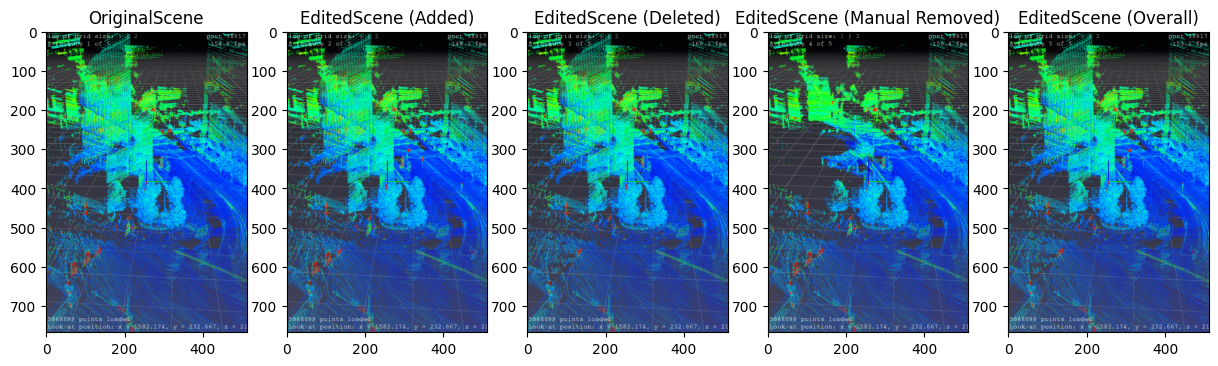

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].set_title("OriginalScene")
axs[0].imshow(mediapy.read_image("1.png"))

# see the difference at (300, 300) pixels
axs[1].set_title("EditedScene (Added)")
axs[1].imshow(mediapy.read_image("2.png"))

# see the difference at (100, 600) pixels
axs[2].set_title("EditedScene (Deleted)")
axs[2].imshow(mediapy.read_image("3.png"))

# see the difference at (100, 300) pixels
axs[3].set_title("EditedScene (Manual Removed)")
axs[3].imshow(mediapy.read_image("4.png"))

# contain both v0.add and v0.delete differences
axs[4].set_title("EditedScene (Overall)")
axs[4].imshow(mediapy.read_image("5.png"))

In [39]:
# also, all the changes are traceable via the following properties
# note that `added_indices` is point at the edited_scene point clouds
# and the `deleted_indices` is point at the original_scene point clouds

# [indices of first obj, indices of second obj, ...]
changed_indices_added = edited_scene_added.added_indices
changed_indices_deleted = edited_scene_deleted.deleted_indices
changed_indices_manually = edited_scene_manual.deleted_indices
changed_indices_overall_added = edited_scene_overall.added_indices

changed_indices_added = np.concatenate(changed_indices_added)
changed_indices_deleted = np.concatenate(changed_indices_deleted)
changed_indices_manually = np.concatenate(changed_indices_manually)
changed_indices_overall_added = np.concatenate(changed_indices_overall_added)

In [ ]:
pptk_viewer.set(window_size=(512, 512))

In [ ]:
# === step 0: switch to the first attribute ===
# pptk_viewer.capture("original.png")

# === step 1: switch to the second attribute ===
# pptk_viewer.capture("added.png")
# pptk_viewer.set(selected=changed_indices_added + len(origin_scene.pcd_xyz))
# pptk_viewer.capture("added.selected.png")

# === step 2: cancel selection by right click ===

# === step 3: switch to the third attribute ===
# pptk_viewer.capture("deleted.png")
# pptk_viewer.set(selected=changed_indices_deleted)
# pptk_viewer.capture("deleted.selected.png")

# === step 4: cancel selection by right click ===

# === step 5: switch to the fourth attribute ===
# pptk_viewer.capture("manually_removed.png")
# pptk_viewer.set(selected=changed_indices_manually)
# pptk_viewer.capture("manually_removed.selected.png")

# === step 6: cancel selection by right click ===

# === step 7: switch to the fifth attribute ===
# offset = (
#     len(origin_scene.pcd_xyz)
#     + len(edited_scene_added.pcd_xyz)
#     + len(edited_scene_deleted.pcd_xyz)
#     + len(edited_scene_manual.pcd_xyz)
# )
# pptk_viewer.capture("overall.png")
# pptk_viewer.set(
#     selected=np.concatenate(
#         [
#             changed_indices_overall_added + offset,
#             changed_indices_deleted,
#         ]
#     )
# )
# pptk_viewer.capture("overall.selected.png")

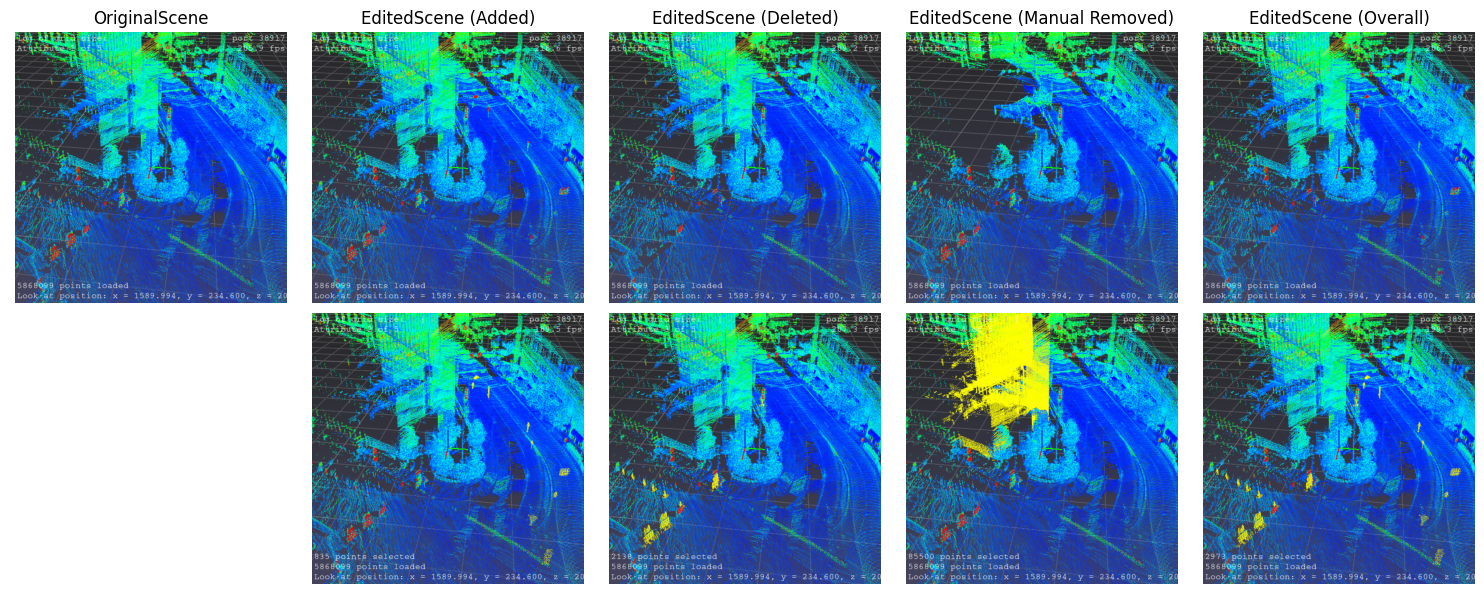

In [50]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

axs[0, 0].set_title("OriginalScene")
axs[0, 0].imshow(mediapy.read_image("original.png"))

axs[0, 1].set_title("EditedScene (Added)")
axs[0, 1].imshow(mediapy.read_image("added.png"))
axs[1, 1].imshow(mediapy.read_image("added.selected.png"))

axs[0, 2].set_title("EditedScene (Deleted)")
axs[0, 2].imshow(mediapy.read_image("deleted.png"))
axs[1, 2].imshow(mediapy.read_image("deleted.selected.png"))

axs[0, 3].set_title("EditedScene (Manual Removed)")
axs[0, 3].imshow(mediapy.read_image("manually_removed.png"))
axs[1, 3].imshow(mediapy.read_image("manually_removed.selected.png"))

axs[0, 4].set_title("EditedScene (Overall)")
axs[0, 4].imshow(mediapy.read_image("overall.png"))
axs[1, 4].imshow(mediapy.read_image("overall.selected.png"))

for ax in axs.flatten():
    ax.axis("off")

fig.tight_layout()

In [ ]:
# sometimes, you may want to visualize it with bounding boxes
viewer = scene_visualization.plot_multiple_pcds_with_bboxes(
    (origin_scene.pcd_xyz, origin_scene.pcd_intensity),
    (edited_scene_overall.pcd_xyz, edited_scene_overall.pcd_intensity),
    bbox_list=[
        edited_scene_overall.added_bounding_boxes(margin=0.0),
        edited_scene_overall.deleted_bounding_boxes(margin=0.0),
    ],
    bbox_color_list=[
        (0.3, 1.0, 0.3),  # green for added
        (1.0, 0.3, 0.3),  # red for deleted
    ],
)
viewer.set(point_size=0.03)

In [ ]:
# first attribute
# viewer.capture("1.png")
# second attribute
# viewer.capture("2.png")

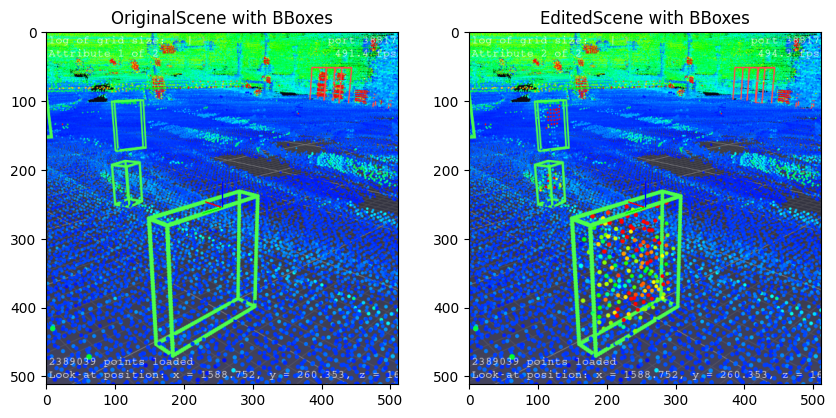

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("OriginalScene with BBoxes")
axs[0].imshow(mediapy.read_image("1.png"))
axs[1].set_title("EditedScene with BBoxes")
axs[1].imshow(mediapy.read_image("2.png"))

---
3. up-to-dated RGB image sequences

In [67]:
# both original and edited scenes can access to pre-prepared RGB image
# sequences, and they are always up-to-dated regarding to their point
# clouds.

print(origin_scene.camera_sequence)
print(edited_scene_manual.camera_sequence)

<CameraSequence contains: 1 cameras>
	<ImageSequences contains 157 392x518 images> (ring_front_left)
<CameraSequence contains: 1 cameras>
	<ImageSequences contains 157 392x518 images> (ring_front_left)


In [71]:
# in fact, they load the same file from scene_db internally
origin_scene.camera_seq_filepath == edited_scene_manual.camera_seq_filepath

True

scene has: ['ring_front_left']



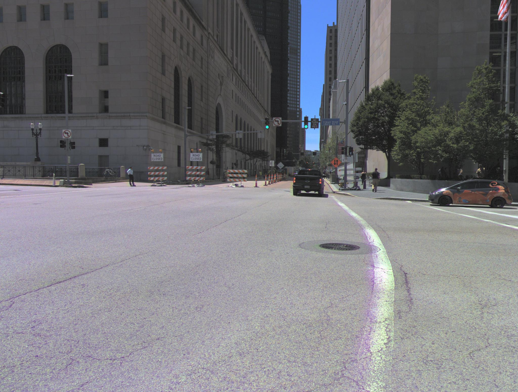

In [76]:
# from 02.usage.argoverse2.ipynb, we know argoverse.img_sequences can
# easily resize images and generate depth maps from point clouds.
# similarly, both OriginalScene and EditedScene have the same APIs to
# access to those functionalities.

print("scene has:", origin_scene.cameras)
mediapy.show_image(origin_scene.get_an_image("ring_front_left", index=0))

In [117]:
# also, scene instance can replace camera sequences if needed
# it will dump the modified camera sequence into the local file
# so that next time when loading from scene_db, it will load the
# modified version.

# Thus, be cautious when replacing camera sequences!

# get lidar_timestamps for further demo
lidar_timestamps = argoverse2.SweepSequence(scene_id).timestamps

print("original camera sequence:\n", origin_scene.camera_sequence)
backup_camera_sequence = origin_scene.camera_sequence

new_camera_sequence = argoverse2.CameraSequence(
    backup_camera_sequence.log_id,
    cameras=backup_camera_sequence.list_cameras(),
)
print("new camera sequence:\n", new_camera_sequence)

origin_scene.camera_sequence = new_camera_sequence
print("after replacement, camera sequence:\n", origin_scene.camera_sequence)

origin_scene.camera_sequence = new_camera_sequence.resize(392, 518)
print("after replacement, camera sequence:\n", origin_scene.camera_sequence)

new_camera_sequence = new_camera_sequence.resize(392, 518)
new_camera_sequence = new_camera_sequence.align_timestamps(lidar_timestamps)
origin_scene.camera_sequence = new_camera_sequence
print("after replacement, camera sequence:\n", origin_scene.camera_sequence)

# finally, we can restore the original camera sequence back
origin_scene.camera_sequence = backup_camera_sequence
print("after restoration, camera sequence:\n", origin_scene.camera_sequence)

# note that, the original camera_sequences is created exactly by
# resize to 392x518 and align to lidar_timestamps
# here, we can verify the intrinsic matrices are the same
backup_intrinsic = backup_camera_sequence.get_a_camera(0).intrinsic
update_intrinsic = new_camera_sequence.get_a_camera(0).intrinsic
np.all(backup_intrinsic == update_intrinsic)

original camera sequence:
 <CameraSequence contains: 1 cameras>
	<ImageSequences contains 157 392x518 images> (ring_front_left)
new camera sequence:
 <CameraSequence contains: 1 cameras>
	<ImageSequences contains 319 1550x2048 images> (ring_front_left)
after replacement, camera sequence:
 <CameraSequence contains: 1 cameras>
	<ImageSequences contains 319 1550x2048 images> (ring_front_left)
after replacement, camera sequence:
 <CameraSequence contains: 1 cameras>
	<ImageSequences contains 319 392x518 images> (ring_front_left)
after replacement, camera sequence:
 <CameraSequence contains: 1 cameras>
	<ImageSequences contains 157 392x518 images> (ring_front_left)
after restoration, camera sequence:
 <CameraSequence contains: 1 cameras>
	<ImageSequences contains 157 392x518 images> (ring_front_left)


True

0 <ImageSequences contains 319 1550x2048 images> (ring_front_left)
1 <ImageSequences contains 319 1201x1587 images> (ring_front_left)
2 <ImageSequences contains 319 852x1126 images> (ring_front_left)
3 <ImageSequences contains 319 503x665 images> (ring_front_left)
4 <ImageSequences contains 319 155x204 images> (ring_front_left)


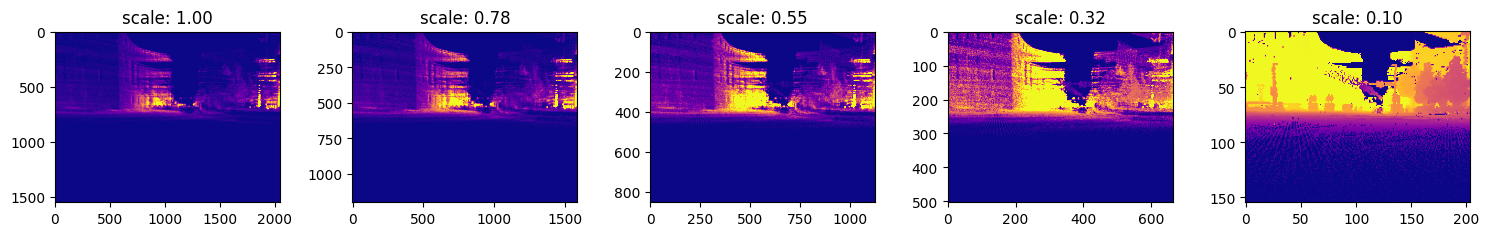

In [131]:
# visualize how resolution changed affect depth maps
# if the images are resized smaller, the depth maps will be denser but
# less accurate when projecting depth map back to 3D space.

new_img_seq = argoverse2.ImageSequence(scene_id, "ring_front_left")
H, W = new_img_seq.figsize

scale = np.linspace(1.0, 0.1, num=5)
scaled_img_seqs = [new_img_seq.resize(int(H * i), int(W * i)) for i in scale]

for i, img_seq in enumerate(scaled_img_seqs):
    print(i, img_seq)

depth_maps = []
for img_seq in scaled_img_seqs:
    d = img_seq.get_a_depth_map(
        index=0,
        points=origin_scene.pcd_xyz,
        invalid_value=-1,
    )
    depth_maps.append(d)

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, d in enumerate(depth_maps):
    axs[i].set_title(f"scale: {scale[i]:.2f}")
    axs[i].imshow(d, cmap="plasma", vmin=0, vmax=50)
fig.tight_layout()

In [138]:
# now let's visualize depth maps between original and edited scenes

# first create a smaller camera sequence for faster visualization
frame_slice = slice(0, 50, 3)  # visualize first 5 frames

new_cam_seq = argoverse2.CameraSequence(
    scene_id,
    cameras=["ring_front_left"],
)
img_seq = new_cam_seq.get_a_camera(0)
img_seq = img_seq.resize(392, 518)
img_seq = img_seq.align_timestamps(lidar_timestamps)
img_seq = img_seq[frame_slice]
new_cam_seq.set_a_camera(img_seq)
print(new_cam_seq)

origin_scene.camera_sequence = new_cam_seq
edited_scene_manual.camera_sequence = new_cam_seq

<CameraSequence contains: 1 cameras>
	<ImageSequences contains 17 392x518 images> (ring_front_left)


In [157]:
RGB_frames = []
for i in range(len(img_seq)):
    rgb = origin_scene.get_an_image("ring_front_left", index=i)
    RGB_frames.append(rgb)
RGB_frames = np.stack(RGB_frames, axis=0)

origin_d_frames = origin_scene.camera_depth_map["ring_front_left"]
edited_d_frames = edited_scene_manual.camera_depth_map["ring_front_left"]
edited_change_map = edited_scene_manual.camera_change_map()["ring_front_left"]

print("RGB:", RGB_frames.shape)
print("Original Depth Maps:", origin_d_frames.shape)
print("Edited Depth Maps:", edited_d_frames.shape)
print("Edited Change Maps:", edited_change_map.shape)

RGB: (17, 392, 518, 3)
Original Depth Maps: (17, 392, 518)
Edited Depth Maps: (17, 392, 518)
Edited Change Maps: (17, 392, 518)


In [177]:
func = py_utils.visualization_pptk.make_color(
    s_min=0,
    s_max=80,
    color_map=np.array(
        [
            [0, 0, 0],  # black
            [1, 1, 1],  # white
        ]
    ),
)

colour_origin_d_frames = func(origin_d_frames)
colour_edited_d_frames = func(edited_d_frames)

colour_origin_d_frames[np.isnan(origin_d_frames)] = 1  # set invalid to white
colour_edited_d_frames[np.isnan(edited_d_frames)] = 1  # set invalid to white


print("Colored Original Depth Maps:", colour_origin_d_frames.shape)
print("Colored Edited Depth Maps:", colour_edited_d_frames.shape)

Colored Original Depth Maps: (17, 392, 518, 3)
Colored Edited Depth Maps: (17, 392, 518, 3)


In [175]:
overlayed_RGB_frames = py_utils.utils_img.overlay_image(
    image=RGB_frames / 255.0,
    layer=[1.0, 0, 0],
    mask=edited_change_map,
)
overlayed_RGB_frames.shape

(17, 392, 518, 3)

In [178]:
# here, we have
# RGB_frames: (N, H, W, 3)
# colour_origin_d_frames: (N, H, W, 3)
# colour_edited_d_frames: (N, H, W, 3)
# overlayed_RGB_frames: (N, H, W, 3)

row_0 = np.concatenate(
    [
        RGB_frames / 255.0,
        overlayed_RGB_frames,
    ],
    axis=2,
)
row_1 = np.concatenate(
    [
        colour_origin_d_frames,
        colour_edited_d_frames,
    ],
    axis=2,
)
frames = np.concatenate([row_0, row_1], axis=1)

print("Final visualization frames:", frames.shape)
mediapy.show_video(frames, fps=2)

Final visualization frames: (17, 784, 1036, 3)



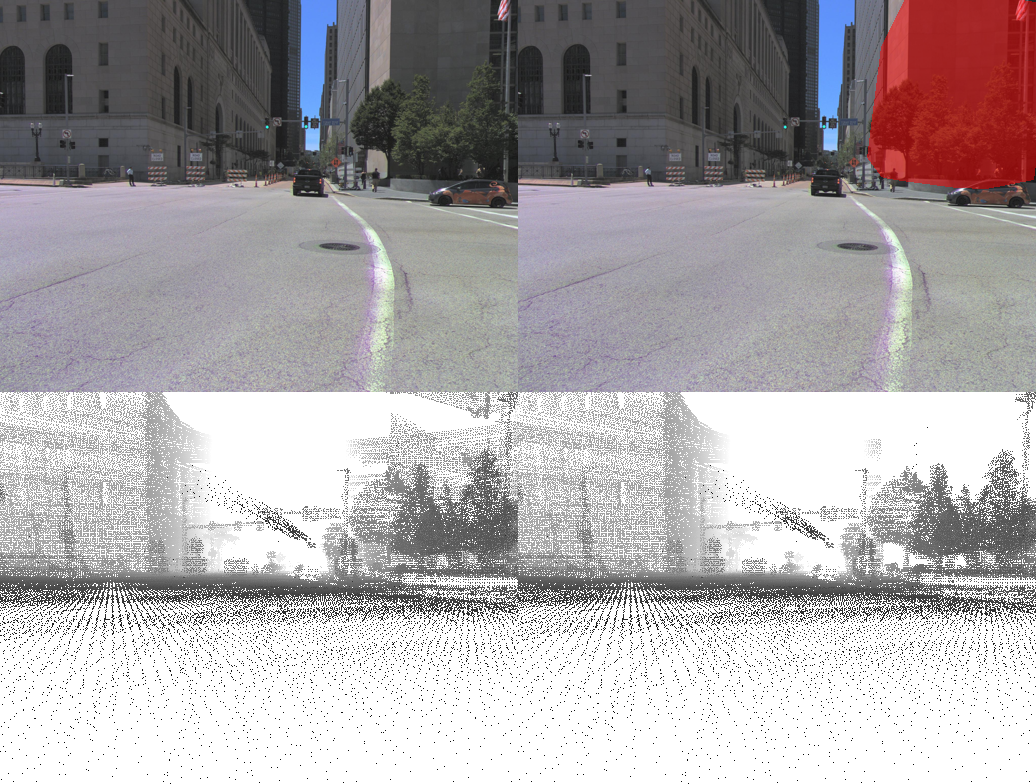

In [180]:
mediapy.show_image(frames[0])


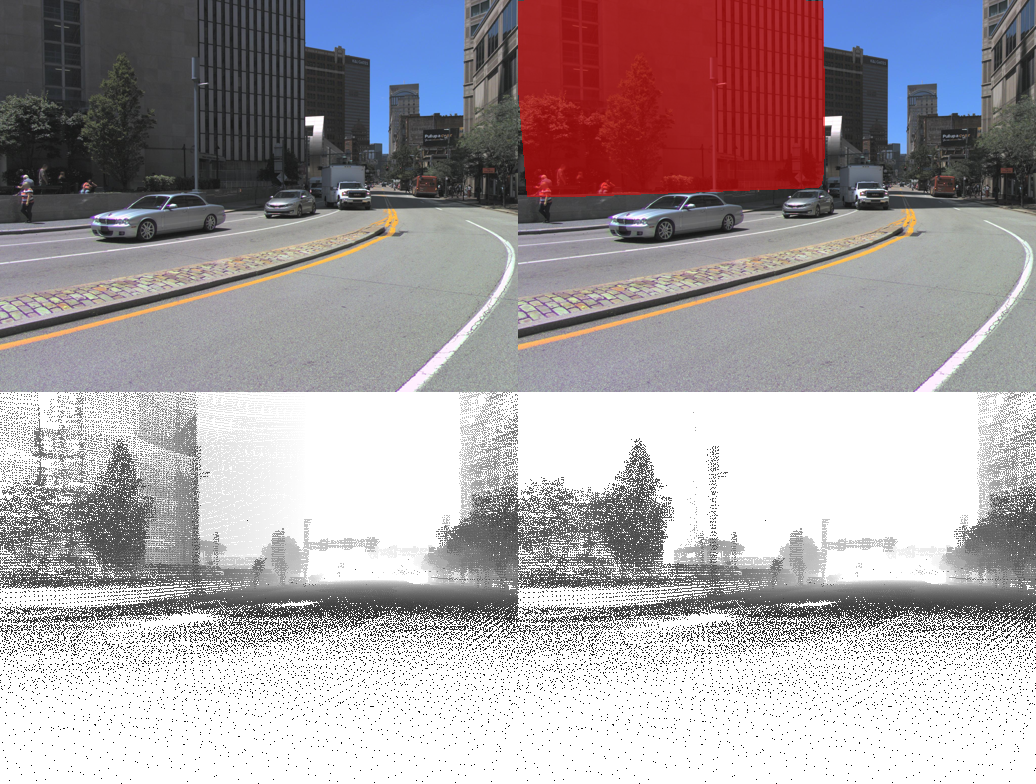

In [181]:
mediapy.show_image(frames[8])